# Introduction
This notebook is to practice tidying up & preparing data sets for subsequent exploratory data analysis.


# Data set used: catalog of the Human Microbiome Project
The data set I choose to use for this exercise is The Human Microbiome Project's catalog of microbes inhabiting human bodies, obtained from Kaggle at https://www.kaggle.com/bbhatt001/human-microbiome-project.

# Initial data exploration

In [360]:
import pandas as pd

df = pd.read_csv('datasets/human-microbiome-project/project_catalog.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
HMP ID                     2915 non-null int64
GOLD ID                    1783 non-null object
Organism Name              2915 non-null object
Domain                     2712 non-null object
NCBI Superkingdom          2751 non-null object
HMP Isolation Body Site    2915 non-null object
Project Status             2915 non-null object
Current Finishing Level    1579 non-null object
NCBI Submission Status     2915 non-null object
NCBI Project ID            2915 non-null int64
Genbank ID                 1579 non-null object
Gene Count                 2915 non-null int64
IMG/HMP ID                 2915 non-null int64
HOMD ID                    397 non-null object
Sequencing Center          2911 non-null object
Funding Source             2915 non-null object
Strain Repository ID       1377 non-null object
dtypes: int64(4), object(13)
memory usage: 387.2+ KB


In [361]:
df.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974"
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517


In [362]:
# "HMP ID" appears to be the unique ID for organisms, so let's make it an index
df.set_index("HMP ID", inplace=True)
df.index

Int64Index([   1,    4,    5,   10,   12,   13,   14,   15,   16,   17,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', name='HMP ID', length=2915)

In [363]:
df.describe()

,NCBI Project ID,Gene Count,IMG/HMP ID
count,2915.000000,2915.000000,2.915000e+03
mean,152890.012007,1474.622642,2.250715e+08
std,104857.664414,1653.762393,5.295180e+08
min,0.000000,0.000000,0.000000e+00
25%,49365.000000,0.000000,0.000000e+00
50%,169465.000000,1517.000000,0.000000e+00
75%,269820.500000,2489.500000,0.000000e+00
max,311149.000000,8490.000000,2.524023e+09


## Check out the categorical variables

In [364]:
categoricals = ['Domain', 'NCBI Superkingdom', 'HMP Isolation Body Site', 'Current Finishing Level', 'Sequencing Center', 'Funding Source']
for cat in categoricals:
    print('"' + cat + '": ' + str(pd.Categorical(df[cat]).categories.values))

"Domain": ['ARCHAEAL' 'BACTERIAL' 'EUKARYAL' 'VIRUS']
"NCBI Superkingdom": ['Archaea' 'Bacteria' 'Error!!!' 'Eukaryota' 'Viruses']
"HMP Isolation Body Site": ['airways' 'blood' 'bone' 'ear' 'eye' 'gastrointestinal_tract' 'heart'
 'liver' 'lymph_nodes' 'nose' 'oral' 'other' 'skin' 'unknown'
 'urogenital_tract' 'wound']
"Current Finishing Level": ['Level 1: Standard Draft' 'Level 2: High-Quality Draft'
 'Level 3: Improved-High-Quality Draft' 'Level 5: Non-contiguous Finished'
 'Level 6: Finished']
"Sequencing Center": ['Baylor College of Medicine' 'Broad Institute' 'J. Craig Venter Institute'
 'NIH Intramural Sequencing Center (NISC)' 'Sanger Institute'
 'Univ of Tokyo' 'Virginia Commonwealth Univ' 'Wakayama Medical Univ'
 'Washington University Genome Sequencing Center']
"Funding Source": ['IHMC-DARPA' 'IHMC-JST' 'IHMC-MetaHIT' 'NIH-HMP' 'NIH-HMP Demo Projects'
 'NIH-HMP Jumpstart Supplement' 'NIH-HMP NHGRI' 'NIH-HMP Sequencing Center'
 'NIH-NHGRI' 'NIH-NIAID']


## Plot basic value frequencies

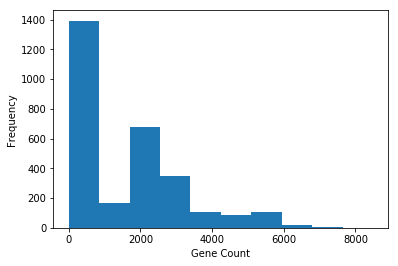

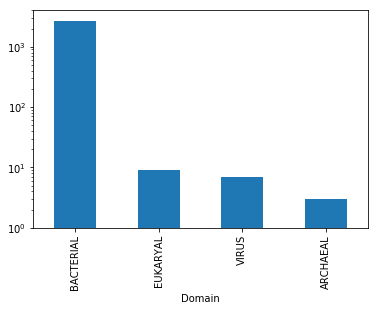

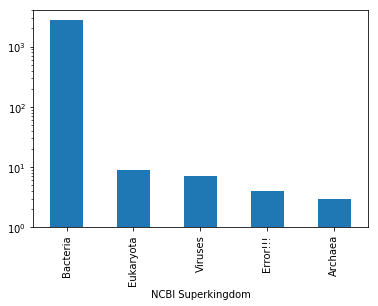

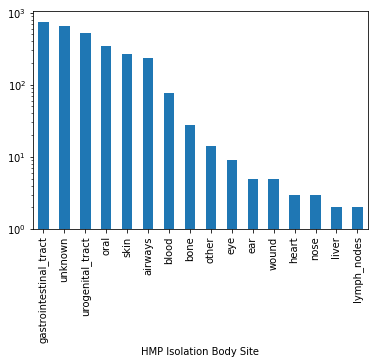

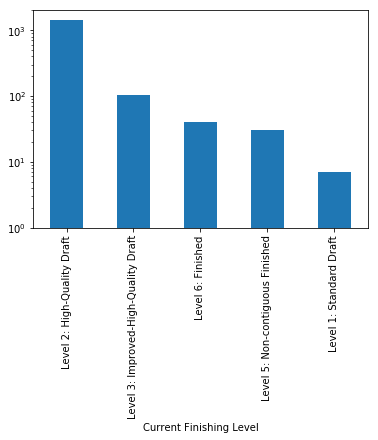

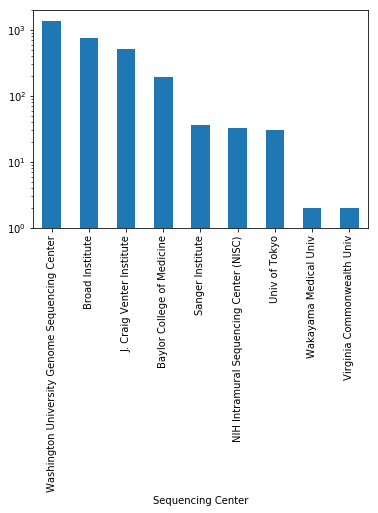

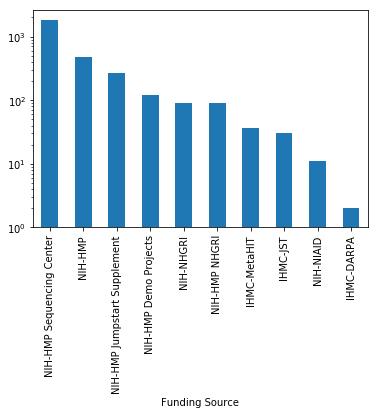

In [365]:
import matplotlib.pyplot as plt

# Plot numerics as histograms:
df['Gene Count'].plot('hist')
plt.xlabel('Gene Count')
plt.show()

# Plot categoricals as bars:
for cat in categoricals:
    df[cat].value_counts().plot(kind='bar', log=True)
    plt.xlabel(cat)
    plt.show()

## Look for variable correlations

In [366]:
df.corr()

,NCBI Project ID,Gene Count,IMG/HMP ID
NCBI Project ID,1.000000,-0.606112,-0.429478
Gene Count,-0.606112,1.000000,0.334027
IMG/HMP ID,-0.429478,0.334027,1.000000


# Assessment
For my purpose I will describe this data set's symantics as follows.

The **variables** are:
- name
- body site
- gene count
- domain/superkingdom
- various organism IDs
- various project attributes: IDs, statuses, funding
- sequencing center attributes

The included **observations** are:
- organisms
- projects, sequencing centers, and funding info

# Clean up & prep tasks
Based on the above I will make the decision to isolate only the most interesting observations -- those pertaining directly to the organisms.  Therefore I will clean the data set in the following ways:
1. exclude variables which are not directly related to the organisms, i.e. project and sequencing center information
1. determine whether observations with incomplete project statuses are worth including in the final data set
   - See what PROJECT STATUS correlates too
   - See if GENE COUNT and project status's correlate
1. look for any missing data and remove or impute them where reasonable. Examples:
   - 'Gene Count' == 0.  Should be reasonable to imput with the avg of the field, or per body site group if there turns out to be a significant correlation.
   - 'NCBI Superkingdom' == 'Error!!!'
   - 'Domain' and 'NCBI Superkingdom' contain NaNs
1. look for and clean up any redundant data
1. clean up any outliers

## Clean up task: Exclude irrelevant information
Let's take a look at all the unique values and their frequency counts to assess the data more deeply and broadly.

In [367]:
for col in df.columns:
    print('\n=======================================')
    print(col + ":")
    print(df[col].value_counts(dropna=False).head())


GOLD ID:
NaN          1132
Gc00809         1
Gi0049271       1
Gi09085         1
Gi11044         1
Name: GOLD ID, dtype: int64

Organism Name:
Aeromonas veronii AMC34                  3
Facklamia languida CCUG 37842            2
butyrate-producing bacterium SS3/4       2
Clostridium ramosum DSM 1402             2
Haemophilus parainfluenzae ATCC 33392    2
Name: Organism Name, dtype: int64

Domain:
BACTERIAL    2696
NaN           203
EUKARYAL        8
VIRUS           6
ARCHAEAL        2
Name: Domain, dtype: int64

NCBI Superkingdom:
Bacteria     2732
NaN           164
Eukaryota       8
Viruses         6
Error!!!        3
Name: NCBI Superkingdom, dtype: int64

HMP Isolation Body Site:
gastrointestinal_tract    745
unknown                   654
urogenital_tract          529
oral                      347
skin                      267
Name: HMP Isolation Body Site, dtype: int64

Project Status:
Complete       1579
In Progress    1336
Name: Project Status, dtype: int64

Current Finishing Le

Based on both the [description of column definitions here](https://www.kaggle.com/bbhatt001/human-microbiome-project) and the above value counts output we can determine some non-essential variables to exclude:
- **External IDs**. A number of IDs reference external databases and are only populated where a references exists or has been manually populated.  These are non-unique IDs and containing NaNs so let's clean them out:
    - `GOLD ID` - References the Genomes Online Databasee.
    - `Genbank ID` - References the GenBank sequence database.
    - `IMG/HMP ID` - References the Integrated Microbial Genomes system.
    - `HOMD ID` - References the Human Oral Microbiome Database.
    - `Strain Repository ID` - Actually references *multiple different types* of external databases where the cultures appear to be physically stored.  Another level of untidiness we can fortunately do without.
- **Project-related variables** (columns listed below)

In [368]:
extra_ids = ['GOLD ID', 'Genbank ID', 'IMG/HMP ID', 'HOMD ID', 'Strain Repository ID']
project_variables = ['Project Status', 'Current Finishing Level', 'NCBI Submission Status', 'NCBI Project ID', 'Sequencing Center', 'Funding Source']

organisms_df = df.drop(extra_ids + project_variables, axis=1)

# Which leaves us with these core columns:
organisms_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 1 to 9999
Data columns (total 5 columns):
Organism Name              2915 non-null object
Domain                     2712 non-null object
NCBI Superkingdom          2751 non-null object
HMP Isolation Body Site    2915 non-null object
Gene Count                 2915 non-null int64
dtypes: int64(1), object(4)
memory usage: 136.6+ KB


## Clean up task: missing values

In [369]:
organisms_df.isnull().any()

Organism Name              False
Domain                      True
NCBI Superkingdom           True
HMP Isolation Body Site    False
Gene Count                 False
dtype: bool

The `Domain` and `NCBI Superkingdom` clearly contain NaNs however are mostly redundant so we'll combine them further below.

### "HMP Isolation Body Site"
`HMP Isolation Body Site` actually contains "unknown" values.  It's not reasonable to try to impute any value here so let's convert these to None.

In [377]:
organisms_df['HMP Isolation Body Site'].value_counts(dropna=False)

gastrointestinal_tract    745
unknown                   654
urogenital_tract          529
oral                      347
skin                      267
airways                   236
blood                      75
bone                       27
other                      13
eye                         8
ear                         4
wound                       4
heart                       2
nose                        2
liver                       1
lymph_nodes                 1
Name: HMP Isolation Body Site, dtype: int64

In [380]:
organisms_df['HMP Isolation Body Site - clean'] = organisms_df['HMP Isolation Body Site'].replace({'unknown': None})

###
# Note the "gotcha" in replace() -- we must use the dict format for the first param, otherwise specifify a single str value to replace uses method=pad by default, which is not what we want!
# See the "peculiarity" explained in the last few paragraphs of the docs: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.replace.html?highlight=replace
###

organisms_df['HMP Isolation Body Site - clean'].value_counts(dropna=False)

gastrointestinal_tract    745
NaN                       654
urogenital_tract          529
oral                      347
skin                      267
airways                   236
blood                      75
bone                       27
other                      13
eye                         8
ear                         4
wound                       4
heart                       2
nose                        2
liver                       1
lymph_nodes                 1
Name: HMP Isolation Body Site - clean, dtype: int64

### "Gene Count"
`Gene Count` contains many zeros and it's reasonable to impute a value for these using the median.

In [381]:
organisms_df['Gene Count'].value_counts(dropna=False).head()

0       1392
2529       5
2428       4
2350       4
1929       4
Name: Gene Count, dtype: int64

In [ ]:
gene_count_median = int(organisms_df['Gene Count'].median())
print(gene_count_median)
organisms_df['Gene Count'].fillna(gene_count_median, inplace=True)

# Verify results
organisms_df['Gene Count'].value_counts(dropna=False).head()

# TODO: Correct this :)

Check out results of "cleaning" the NaN/None values:

In [374]:
organisms_df.isnull().any()

Organism Name                      False
Domain                              True
NCBI Superkingdom                   True
HMP Isolation Body Site            False
Gene Count                         False
HMP Isolation Body Site - clean     True
dtype: bool

## Clean up task: Remove redundant variables
The `Domain` and `NCBI Superkingdom` fields are mostly redundant so let's choose the most complete of the two to keep.

In [ ]:
# TODO

## Clean up task: Outliers

In [ ]:
# TODO

# Summary
We now have a complete and clean data set containing only the organisms found in the human microbiome.